# EDA VÀ LÀM SẠCH DỮ LIỆU

## 1. Mô tả dữ liệu
- Bộ dữ liệu được sử dụng là "Vietnam Housing Dataset (Hanoi)" do anh Lê Anh Đức cung cấp trên nền tảng Kaggle(https://www.kaggle.com/datasets/ladcva/vietnam-housing-dataset-hanoi)
- Bộ dữ liệu bao gồm tất các 12 thuộc tính cơ bản nhất của một bất động sản tại Việt Nam như sau:
    - Ngày: Ngày đăng tin hoặc ngày thu thập dữ liệu của bất động sản.
    - Địa chỉ: Địa chỉ chi tiết của bất động sản.
    - Quận: Đơn vị hành chính cấp quận nơi bất động sản tọa lạc.
    - Huyện: Đơn vị hành chính cấp huyện nơi bất động sản tọa lạc (thường là khu vực ngoại thành).
    - Loại hình nhà ở: Phân loại hình thái của bất động sản (ví dụ: Nhà mặt phố, mặt tiền, Nhà ngõ, hẻm).
    - Giấy tờ pháp lý: Tình trạng giấy tờ xác nhận quyền sở hữu hoặc sử dụng (ví dụ: Sổ đỏ/Sổ hồng, Hợp đồng mua bán).
    - Số tầng: Tổng số tầng của công trình nhà ở.
    - Số phòng ngủ: Tổng số lượng phòng ngủ trong bất động sản.
    - Diện tích: Tổng diện tích của bất động sản, đơn vị tính là mét vuông (m²).
    - Dài: Kích thước chiều dài của bất động sản, đơn vị tính là mét (m).
    - Rộng: Kích thước chiều rộng của bất động sản, đơn vị tính là mét (m).
    - Giá/m2: Đơn giá tham khảo trên một mét vuông, được tính bằng cách lấy tổng giá trị chia cho tổng diện tích.

## 2. Làm sạch và tiền xử lý dữ liệu
### 2.1. Import thư viện cần thiết và đọc file dữ liệu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
import re

In [2]:
df = pd.read_csv('F:\Data Analyst\Ha Noi Real Estate Visualization\data\VN_housing_dataset.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16984\1818841708.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('F:\Data Analyst\Ha Noi Real Estate Visualization\data\VN_housing_dataset.csv')


,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,3.0,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,4.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"


### 2.2. Xử lý tổng quát

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82497 entries, 0 to 82496
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       82496 non-null  float64
 1   Ngày             82496 non-null  object 
 2   Địa chỉ          82449 non-null  object 
 3   Quận             82495 non-null  object 
 4   Huyện            82449 non-null  object 
 5   Loại hình nhà ở  82465 non-null  object 
 6   Giấy tờ pháp lý  53610 non-null  object 
 7   Số tầng          36399 non-null  object 
 8   Số phòng ngủ     82458 non-null  object 
 9   Diện tích        82495 non-null  object 
 10  Dài              19827 non-null  object 
 11  Rộng             35445 non-null  object 
 12  Giá/m2           82484 non-null  object 
dtypes: float64(1), object(12)
memory usage: 8.2+ MB


In [4]:
# Xóa bỏ cột Unnamed: 0 không cần thiết
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
# Kiểm tra các giá trị trùng lặp trong DataFrame
print(df.duplicated().sum())

815


In [6]:
# Loại bỏ các hàng trùng lặp và xem số dòng còn lại
df = df.drop_duplicates()
df_rows = df.shape
print('Số hàng và số cột còn lại là:',df.shape)

Số hàng và số cột còn lại là: (81682, 12)


In [7]:
# Kiểm tra các giá trị null ở mỗi một của DataFrame
print(df.isnull().sum()/len(df) * 100)

Ngày                0.001224
Địa chỉ             0.058764
Quận                0.002449
Huyện               0.058764
Loại hình nhà ở     0.039176
Giấy tờ pháp lý    34.795916
Số tầng            55.658529
Số phòng ngủ        0.047746
Diện tích           0.002449
Dài                75.823315
Rộng               56.787297
Giá/m2              0.015915
dtype: float64


In [8]:
# Loại bỏ các dòng có 5 cột null trở lên
df.dropna(thresh=df.shape[1] - 5, inplace=True)
df.isnull().sum()/len(df)*100

Ngày                0.000000
Địa chỉ             0.026944
Quận                0.001225
Huyện               0.023269
Loại hình nhà ở     0.033067
Giấy tờ pháp lý    34.771959
Số tầng            55.642238
Số phòng ngủ        0.045314
Diện tích           0.001225
Dài                75.814432
Rộng               56.771420
Giá/m2              0.014697
dtype: float64

In [9]:
# Kiểm tra cột giá nhà 
df[df["Giá/m2"].isnull()].shape[0]

12

In [10]:
# Loại bỏ 12 dòng null do ta không tìm được dữ liệu bổ sung
df.dropna(subset=['Giá/m2'],inplace=True)

In [11]:
# Kiểm tra cột "Quận"
df[df["Quận"].isnull()]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
48418,2020-07-03,"68, Ngọc Hồi, Hà Nội",NaN,NaN,"Nhà ngõ, hẻm",Đã có sổ,NaN,2 phòng,71 m²,6 m,6 m,43 triệu/m²


In [12]:
# FIll dữ liệu từ cột địa chỉ
df.loc[48418,'Quận'] = 'Thanh Trì'
df.loc[48418,'Huyện'] = 'Ngọc Hồi'
print(df.loc[48418])

Ngày                         2020-07-03
Địa chỉ            68, Ngọc Hồi, Hà Nội
Quận                          Thanh Trì
Huyện                          Ngọc Hồi
Loại hình nhà ở            Nhà ngõ, hẻm
Giấy tờ pháp lý                Đã có sổ
Số tầng                             NaN
Số phòng ngủ                    2 phòng
Diện tích                         71 m²
Dài                                 6 m
Rộng                                6 m
Giá/m2                      43 triệu/m²
Name: 48418, dtype: object


In [13]:
# Kiểm tra cột "Huyện"
df[df['Huyện'].isnull()]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
324,2020-08-04,"Đường An Dương Vương, Quận Tây Hồ, Hà Nội",Quận Tây Hồ,NaN,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,77 m²,11 m,7 m,"97,4 triệu/m²"
741,2020-08-04,"Cầu Khê Tang, Quận Hà Đông, Hà Nội",Quận Hà Đông,NaN,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,36 m²,NaN,NaN,"43,06 triệu/m²"
8584,2020-07-31,NaN,Quận Thanh Xuân,NaN,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,33 m²,NaN,4.1 m,"90,91 triệu/m²"
29300,2020-07-18,"Đường Cầu Giấy, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,NaN,"Nhà ngõ, hẻm",Đã có sổ,4,3 phòng,24 m²,NaN,NaN,"129,17 triệu/m²"
35553,2020-07-14,"Đường Thịnh Hào 3, Quận Đống Đa, Hà Nội",Quận Đống Đa,NaN,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,36 m²,NaN,NaN,100 triệu/m²
40906,2020-07-09,"Đường Kim Giang, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,NaN,"Nhà mặt phố, mặt tiền",NaN,NaN,4 phòng,40 m²,NaN,NaN,"82,5 triệu/m²"
46176,2020-07-06,"Đường Cầu Giấy, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,NaN,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,50 m²,NaN,NaN,80 triệu/m²
54426,2020-06-29,"Đường Trần Duy Hưng, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,NaN,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,40 m²,NaN,NaN,140 triệu/m²
58641,2020-06-25,"Đường Bùi Xương Trạch, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,NaN,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,31 m²,NaN,NaN,"116,13 triệu/m²"
61781,2020-06-23,"Đường Tôn Thất Tùng, Quận Đống Đa, Hà Nội",Quận Đống Đa,NaN,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,37 m²,NaN,NaN,"110,81 triệu/m²"


In [14]:
df['Huyện'].fillna(df['Quận'], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16984\900650199.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Huyện'].fillna(df['Quận'], inplace=True)


In [15]:
# Thêm cột "Tỉnh/Thành phố"
df['Tỉnh/Thành phố'] = 'Hà Nội'

In [16]:
df[df['Địa chỉ'].isnull()]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2,Tỉnh/Thành phố
3397,2020-08-03,NaN,Quận Thanh Xuân,Phường Thượng Đình,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,40 m²,NaN,NaN,"68,75 triệu/m²",Hà Nội
8584,2020-07-31,NaN,Quận Thanh Xuân,Quận Thanh Xuân,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,33 m²,NaN,4.1 m,"90,91 triệu/m²",Hà Nội
8926,2020-07-31,NaN,Quận Hoàng Mai,Phường Lĩnh Nam,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,30 m²,NaN,NaN,70 triệu/m²,Hà Nội
9101,2020-07-31,NaN,Quận Bắc Từ Liêm,Phường Thụy Phương,"Nhà ngõ, hẻm",NaN,NaN,2 phòng,40 m²,NaN,NaN,20 triệu/m²,Hà Nội
9105,2020-07-31,NaN,Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,50 m²,NaN,NaN,68 triệu/m²,Hà Nội
11029,2020-07-30,NaN,Quận Hoàng Mai,Phường Vĩnh Hưng,"Nhà ngõ, hẻm",NaN,NaN,2 phòng,20 m²,NaN,NaN,65 triệu/m²,Hà Nội
11677,2020-07-29,NaN,Quận Hà Đông,Phường Văn Quán,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,35 m²,NaN,NaN,"81,43 triệu/m²",Hà Nội
15369,2020-07-27,NaN,Quận Cầu Giấy,Phường Trung Hoà,Nhà phố liền kề,NaN,NaN,3 phòng,35 m²,NaN,NaN,1 đ/m²,Hà Nội
17349,2020-07-26,NaN,Quận Hoàng Mai,Phường Thịnh Liệt,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,40 m²,NaN,NaN,65 triệu/m²,Hà Nội
26003,2020-07-20,NaN,Quận Hà Đông,Phường La Khê,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,35 m²,NaN,NaN,28 đ/m²,Hà Nội


In [17]:
# Hàm fill dữ liệu cho cột "Địa chỉ"
def fill_missing_address(row):
    huyen = row['Huyện']
    quan = row['Quận']
    thanh_pho = row['Tỉnh/Thành phố']
    
    if pd.notnull(huyen) and pd.notnull(quan):
        return huyen + ', ' + quan + ', ' + thanh_pho
    elif pd.notnull(huyen):
        return huyen + ', ' + thanh_pho
    elif pd.notnull(quan):
        return quan + ', ' + thanh_pho
    else:
        return thanh_pho

df['Địa chỉ'] = df.apply(fill_missing_address, axis=1)

- Để trực quan hóa trên Tableu ta sẽ cần điều chỉnh lại dữ liệu ở cột "Quận", các tiền tố như quận, thị xã, huyện, ... sẽ phải loại bỏ. Để tránh ảnh hưởng đến dữ liệu gốc ta sẽ tạo ra cột "Quận_tableau"

In [18]:
df['Quận_tableau'] = df['Quận'].str.replace('Thị xã', '').str.replace('Huyện', '').str.replace('Quận', '')

In [19]:
df['Quận_tableau'] = df['Quận_tableau'].apply(lambda x: unidecode(x).strip())

In [20]:
# Thay thế Nam Tu Liem và Bac Tu Liem thành Tu Liem
df['Quận_tableau'] = df['Quận_tableau'].replace(['Nam Tu Liem', 'Bac Tu Liem'], 'Tu Liem')

In [21]:
# Xem có bao nhiêu loại hình nhà ở
df['Loại hình nhà ở'].unique()

array(['Nhà ngõ, hẻm', 'Nhà mặt phố, mặt tiền', 'Nhà biệt thự',
       'Nhà phố liền kề', nan], dtype=object)

In [22]:
df[df["Loại hình nhà ở"].isnull()].shape[0]

27

In [23]:
# Thay thế ô null bằng 'Không rõ'
df['Loại hình nhà ở'].fillna('Không rõ', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16984\1513061100.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loại hình nhà ở'].fillna('Không rõ', inplace=True)


In [24]:
# Kiểm tra cột "Giấy tờ pháp lý"
df[df["Giấy tờ pháp lý"].isnull()].shape[0]

28388

In [25]:
# Tiếp tục thay thế giá trị null bằng "Không rõ"
df['Giấy tờ pháp lý'].fillna("Không rõ", inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16984\2200457342.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Giấy tờ pháp lý'].fillna("Không rõ", inplace=True)


In [26]:
# Tiếp tục kiểm tra cột số tầng 
df[df["Số tầng"].isnull()].shape[0]

45425

In [27]:
# Số dòng có số tầng null khá lớn nên ta sẽ thay thế bằng 1 tầng tức là tương đương đất chưa xây dựng
df['Số tầng'].fillna(1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16984\3374417536.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Số tầng'].fillna(1, inplace=True)


In [28]:
# Kiểm tra cột "Số phòng ngủ"
df[df["Số phòng ngủ"].isnull()].shape[0]

37

- Hai cột chiều dài và chiều rộng có tỷ lệ giá trị null khá lớn đều hơn 50%, ngoài ra đó là quy trình đo đạc còn chưa nhất quán và diện tích đất cũng không rõ ràng trong việc diện tích thật và diện tích sử dụng. Để tránh làm dữ liệu bị hỗn loạn ta sẽ loại bỏ 2 cột này 

In [29]:
df=df.drop(columns=["Dài","Rộng"])

In [30]:
# Kiểm tra tỷ lệ giá trị null trong các cột
df.isnull().sum() / len(df)

Ngày               0.000000
Địa chỉ            0.000000
Quận               0.000000
Huyện              0.000000
Loại hình nhà ở    0.000000
Giấy tờ pháp lý    0.000000
Số tầng            0.000000
Số phòng ngủ       0.000453
Diện tích          0.000000
Giá/m2             0.000000
Tỉnh/Thành phố     0.000000
Quận_tableau       0.000000
dtype: float64

### 2.3. Chuẩn hóa định dạng dữ liệu để xử lý chi tiết 

In [31]:
# Kiểm tra kiểu dữ liệu của các cột
df.dtypes

Ngày               object
Địa chỉ            object
Quận               object
Huyện              object
Loại hình nhà ở    object
Giấy tờ pháp lý    object
Số tầng            object
Số phòng ngủ       object
Diện tích          object
Giá/m2             object
Tỉnh/Thành phố     object
Quận_tableau       object
dtype: object

- Cột "Ngày" cần chuyển về dạng datetime
- Cột "Số tầng", "Số phòng ngủ", "Diện tích", "Giá" cần chuyển về dạng số

In [32]:
# Chuyển đổi kiểu dữ liệu của cột "Ngày"
df['Ngày'] = pd.to_datetime(df['Ngày'])

In [33]:
# Xem các giá trị duy nhất trong cột "Số tầng"
df['Số tầng'].unique()

array(['4', 1, '6', '5', '7', '2', '3', '8', '1', '9', '50', '38', '35',
       '10', 'Nhiều hơn 10', '45', '33', '42', '25', '73', '12', '65',
       '55', '30', '14', '40', '52', '54', '32', '29'], dtype=object)

In [34]:
# Đổi giá trị "Nhiều hơn 10" thành 11
df.loc[df['Số tầng']=='Nhiều hơn 10','Số tầng']=11

In [35]:
# CHuyển "Số tầng" về kiểu số nguyên
df['Số tầng'] = df['Số tầng'].astype(int)

In [36]:
# Xem các giá trị duy nhất trong cột "Số phòng ngủ" 
df["Số phòng ngủ"].unique()

array(['5 phòng', '3 phòng', '4 phòng', '6 phòng', 'nhiều hơn 10 phòng',
       '8 phòng', '2 phòng', '7 phòng', '9 phòng', '1 phòng', '10 phòng',
       nan], dtype=object)

In [37]:
# Đổi giá trị "Nhiều hơn 10 phòng" thành 11
df.loc[df["Số phòng ngủ"]=='nhiều hơn 10 phòng','Số phòng ngủ']='11'

In [38]:
# Loại bỏ từ "phòng" và chuyển đổi về kiểu số nguyên
df["Số phòng ngủ"]=df["Số phòng ngủ"].str.replace('phòng', '')

In [39]:
# Ta cũng sẽ thay thế giá trị null bằng 1 phòng ngủ
df['Số phòng ngủ'].fillna(1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16984\1693482553.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Số phòng ngủ'].fillna(1, inplace=True)


In [40]:
df["Số phòng ngủ"].unique()

array(['5 ', '3 ', '4 ', '6 ', '11', '8 ', '2 ', '7 ', '9 ', '1 ', '10 ',
       1], dtype=object)

In [41]:
df["Số phòng ngủ"]=df["Số phòng ngủ"].astype(int)

In [42]:
# Kiểm tra các giá trị duy nhất của cột "Diện tích"
df["Diện tích"].unique()

array(['46 m²', '37 m²', '40 m²', '51 m²', '36 m²', '52 m²', '32 m²',
       '75 m²', '41 m²', '35 m²', '30 m²', '50 m²', '52.8 m²', '165 m²',
       '70 m²', '34 m²', '65 m²', '45 m²', '79 m²', '90 m²', '73 m²',
       '18 m²', '42 m²', '43 m²', '25 m²', '38 m²', '49 m²', '33 m²',
       '120 m²', '200 m²', '47 m²', '55 m²', '77 m²', '27 m²', '60 m²',
       '81 m²', '20 m²', '54 m²', '28 m²', '113 m²', '76 m²', '62 m²',
       '11 m²', '44 m²', '21 m²', '58 m²', '196 m²', '48 m²', '24 m²',
       '56 m²', '104 m²', '83 m²', '68 m²', '31 m²', '64 m²', '32.1 m²',
       '185 m²', '61 m²', '23 m²', '92 m²', '85 m²', '30.2 m²', '26 m²',
       '140 m²', '31.5 m²', '63 m²', '39 m²', '80 m²', '57 m²', '16 m²',
       '13 m²', '67 m²', '35.22 m²', '110 m²', '35.21 m²', '138 m²',
       '3 m²', '40.22 m²', '22 m²', '32.22 m²', '82 m²', '53 m²', '86 m²',
       '47.3 m²', '33.33 m²', '87 m²', '96 m²', '66 m²', '451 m²',
       '108 m²', '32.07 m²', '125 m²', '33.1 m²', '39.8 m²', '36.5 m²',
 

In [43]:
# Loại bỏ đơn vị "m2" và chuyển về kiểu số thực 
df["Diện tích"]=df["Diện tích"].str.replace('m²', '')
df["Diện tích"]=df["Diện tích"].astype(float)

- Qua quan sát nhanh dễ dàng nhận thấy có những bất động sản có diện tích cực khủng nên ta sẽ sử dụng thư viện mathplotlib để vẽ biểu đồ và loại bỏ các "outlier"

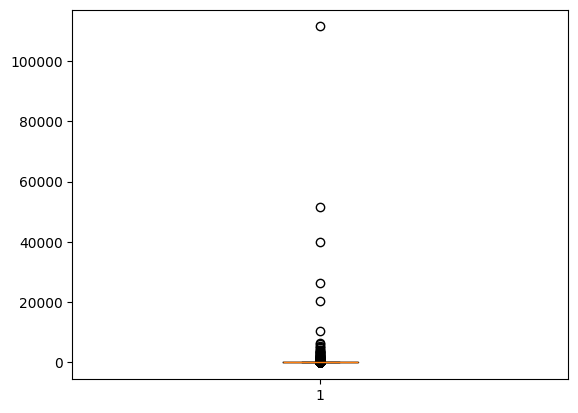

In [44]:
plt.boxplot(df["Diện tích"])
plt.show()

In [45]:
# Xem xét các bất động sản có diện tích nhỏ 99,95% số còn lại 
df[df['Diện tích'] <= df['Diện tích'].quantile(0.0005)]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá/m2,Tỉnh/Thành phố,Quận_tableau
527,2020-08-04,"Phường Mộ Lao, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường Mộ Lao,"Nhà ngõ, hẻm",Đã có sổ,1,3,3.00,810 triệu/m²,Hà Nội,Ha Dong
2939,2020-08-03,"Phường Minh Khai, Quận Hai Bà Trưng, Hà Nội",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,1,5,3.99,"1,316666666 tỷ/m²",Hà Nội,Hai Ba Trung
3597,2020-08-03,"Phường Quan Hoa, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,Phường Quan Hoa,"Nhà ngõ, hẻm",Đã có sổ,1,3,3.00,"1,2 tỷ/m²",Hà Nội,Cau Giay
4506,2020-08-03,"Phường Trương Định, Quận Hai Bà Trưng, Hà Nội",Quận Hai Bà Trưng,Phường Trương Định,"Nhà mặt phố, mặt tiền",Không rõ,1,3,1.00,"2,2 tỷ/m²",Hà Nội,Hai Ba Trung
4562,2020-08-03,"Phường Bạch Mai, Quận Hai Bà Trưng, Hà Nội",Quận Hai Bà Trưng,Phường Bạch Mai,"Nhà mặt phố, mặt tiền",Đã có sổ,1,2,1.00,"2,28 tỷ/m²",Hà Nội,Hai Ba Trung
4818,2020-08-02,"Phường Nhân Chính, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,Phường Nhân Chính,"Nhà ngõ, hẻm",Đã có sổ,1,4,3.00,"1,166666666 tỷ/m²",Hà Nội,Thanh Xuan
9487,2020-07-31,"Phường Long Biên, Quận Long Biên, Hà Nội",Quận Long Biên,Phường Long Biên,"Nhà ngõ, hẻm",Đã có sổ,1,4,2.00,"2,65 tỷ/m²",Hà Nội,Long Bien
10961,2020-07-30,"Phường Phú Đô, Quận Nam Từ Liêm, Hà Nội",Quận Nam Từ Liêm,Phường Phú Đô,"Nhà mặt phố, mặt tiền",Đã có sổ,1,3,3.00,850 triệu/m²,Hà Nội,Tu Liem
13121,2020-07-29,"Phường Mỹ Đình 1, Quận Nam Từ Liêm, Hà Nội",Quận Nam Từ Liêm,Phường Mỹ Đình 1,"Nhà ngõ, hẻm",Không rõ,1,4,4.00,"812,5 triệu/m²",Hà Nội,Tu Liem
16569,2020-07-27,"Phường Cầu Diễn, Quận Nam Từ Liêm, Hà Nội",Quận Nam Từ Liêm,Phường Cầu Diễn,"Nhà ngõ, hẻm",Không rõ,1,4,4.00,"912,5 triệu/m²",Hà Nội,Tu Liem


In [46]:
# Xem các bất động sản có diện tích lớn hơn 99,98% số còn lại
df[df['Diện tích'] >= df['Diện tích'].quantile(0.9998)]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá/m2,Tỉnh/Thành phố,Quận_tableau
1574,2020-08-04,"Phường Khương Đình, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,Phường Khương Đình,"Nhà ngõ, hẻm",Đã có sổ,1,5,3659.0,997.540 đ/m²,Hà Nội,Thanh Xuan
1583,2020-08-04,"Phường Nhân Chính, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,Phường Nhân Chính,"Nhà ngõ, hẻm",Đã có sổ,1,4,6459.0,410.280 đ/m²,Hà Nội,Thanh Xuan
1659,2020-08-04,"Phường Đại Kim, Quận Hoàng Mai, Hà Nội",Quận Hoàng Mai,Phường Đại Kim,"Nhà ngõ, hẻm",Đã có sổ,1,3,20430.0,69.505 đ/m²,Hà Nội,Hoang Mai
5147,2020-08-02,"Phường Minh Khai, Quận Hai Bà Trưng, Hà Nội",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,1,5,4141.0,917.652 đ/m²,Hà Nội,Hai Ba Trung
15202,2020-07-27,"Phường Phú La, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường Phú La,"Nhà ngõ, hẻm",Đã có sổ,2,3,26400.0,62.500 đ/m²,Hà Nội,Ha Dong
17460,2020-07-26,"Phường Ngọc Thụy, Quận Long Biên, Hà Nội",Quận Long Biên,Phường Ngọc Thụy,"Nhà ngõ, hẻm",Đã có sổ,4,3,111411.0,34 đ/m²,Hà Nội,Long Bien
24872,2020-07-21,"Phường Thanh Lương, Quận Hai Bà Trưng, Hà Nội",Quận Hai Bà Trưng,Phường Thanh Lương,Nhà phố liền kề,Đã có sổ,5,3,40000.0,157.500 đ/m²,Hà Nội,Hai Ba Trung
37236,2020-07-13,"Phường Nguyễn Trãi, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường Nguyễn Trãi,"Nhà ngõ, hẻm",Đã có sổ,1,4,4848.0,577.557 đ/m²,Hà Nội,Ha Dong
38704,2020-07-11,"Xã Vân Hòa, Huyện Ba Vì, Hà Nội",Huyện Ba Vì,Xã Vân Hòa,"Nhà mặt phố, mặt tiền",Không rõ,1,2,3600.0,"1,39 triệu/m²",Hà Nội,Ba Vi
53637,2020-06-29,"Xã Tân Triều, Huyện Thanh Trì, Hà Nội",Huyện Thanh Trì,Xã Tân Triều,Nhà phố liền kề,Đã có sổ,3,5,5625.0,746.666 đ/m²,Hà Nội,Thanh Tri


- Dựa vào mối quan hệ giữa "Giá" và "Diện tích" ta thấy đây là mức giá và diện tích vô cùng bất hợp lý nên ta sẽ loại bỏ 

In [47]:
min_=df['Diện tích'].quantile(0.0005)
max_=df['Diện tích'].quantile(0.9998)

df=df[df['Diện tích'] >= min_]
df=df[df['Diện tích'] <= max_]

In [48]:
# Thêm cột "Đơn vị" để kiểm tra các giá trị duy nhất của cột "Giá/m2" dễ hơn
df['Đơn vị'] = df['Giá/m2'].apply(lambda x: re.findall(r'[^\d.,]+', x)[0])
df['Đơn vị'].unique()

array([' triệu/m²', ' đ/m²', ' tỷ/m²'], dtype=object)

In [49]:
# Đếm số lượng từng giá trị trong cột "Đơn vị"
print(df['Đơn vị'].value_counts())

Đơn vị
triệu/m²    80774
đ/m²          719
tỷ/m²         104
Name: count, dtype: int64


- Như vậy ta sẽ quy hết giá bán về đơn vị "triệu/m2"

In [50]:
# Thay thế dấu '.' và ',' trong cột "Giá/m2" để chuyển đổi về định dạng số thực
df['Giá/m2']=df['Giá/m2'].str.replace('.', '')
df['Giá/m2']=df['Giá/m2'].str.replace(',', '.')

In [51]:
# Loại bỏ các đơn vị không cần thiết trong cột "Giá/m2"
df['Giá/m2'] = df['Giá/m2'].str.replace('đ/m²', '').str.replace('triệu/m²', '').str.replace('tỷ/m²', '')

In [52]:
# Ép kiểu dữ liệu về dạng số thực
df["Giá/m2"]=df["Giá/m2"].astype(float)

In [53]:
# hàm chuyển đổi giá bán về triệu đồng/m2
def convert_price(row):
    if row['Đơn vị'] == ' tỷ/m²':
        return row['Giá/m2'] * 1000
    elif row['Đơn vị'] == ' đ/m²':
        return row['Giá/m2'] * 0.000001
    else:
        return row['Giá/m2']

df['Giá/m2'] = df.apply(convert_price, axis=1)

# Loại bỏ cột "Đơn vị" sau khi không cần nữa
df=df.drop(columns="Đơn vị")
# Đổi tên cột "Giá/m2" thành "Giá (triệu đồng/m2)"
df = df.rename(columns={'Giá/m2': 'Giá (triệu đồng/m2)'})

### 2.4. Kiểm tra và loại bỏ các giá trị ngoại lai(Outliers)
- Trước đó ta đã kiểm tra cột "Diện tích" bây giờ sẽ đến cột "Giá (triệu đồng/m2)"

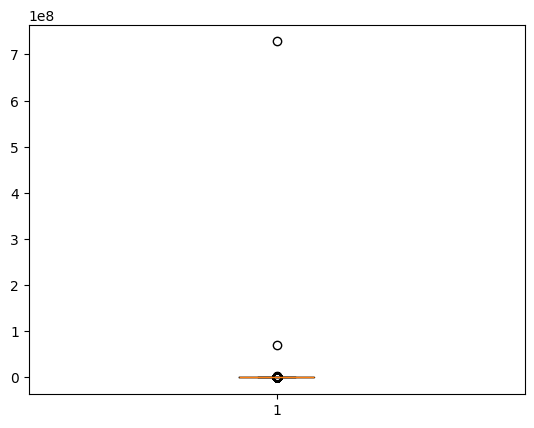

In [54]:
plt.boxplot(df["Giá (triệu đồng/m2)"])
plt.show()

- Cũng khá nhiều outliers nên ta cũng sẽ loại bỏ bớt

In [55]:
df['Lower Bound'] = df.groupby(['Quận'])['Giá (triệu đồng/m2)'].transform(lambda x: x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
df['Upper Bound'] = df.groupby(['Quận'])['Giá (triệu đồng/m2)'].transform(lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))


df = df[(df['Giá (triệu đồng/m2)'] >= df['Lower Bound']) & (df['Giá (triệu đồng/m2)'] <= df['Upper Bound'])]
df = df.drop(['Lower Bound', 'Upper Bound'], axis=1)

In [56]:
df.dtypes

Ngày                   datetime64[ns]
Địa chỉ                        object
Quận                           object
Huyện                          object
Loại hình nhà ở                object
Giấy tờ pháp lý                object
Số tầng                         int64
Số phòng ngủ                    int64
Diện tích                     float64
Giá (triệu đồng/m2)           float64
Tỉnh/Thành phố                 object
Quận_tableau                   object
dtype: object

In [57]:
# Kiểm tra các cột trùng lặp lần cuối 
sum(df.duplicated())

949

In [58]:
df=df.drop_duplicates()

In [59]:
df1=df.drop(columns="Ngày").drop_duplicates(keep='first')
df1["Ngày"]=df.loc[df1.index]["Ngày"]

In [60]:
df1['Quận'] = df1['Quận'].str.replace('Thị xã ', '').str.replace('Huyện ', '').str.replace('Quận ', '')
df1['Quận'] = df1['Quận'].str.replace('Nam Từ Liêm', 'Từ Liêm').str.replace('Bắc Từ Liêm', 'Từ Liêm')

In [61]:
# Bỏ cột ngày để thống kê các biến mà không bị trùng lặp
df1=df.drop(columns="Ngày").drop_duplicates(keep='first')
df1["Ngày"]=df.loc[df1.index]["Ngày"]

### 2.5. Xuất dữ liệu 

In [62]:
# CHuyển đổi cột "Ngày" về định dạng ngày tháng mong muốn
df2 = df1.copy()
df2['Ngày'] = df2['Ngày'].dt.strftime('%Y-%m-%d')

In [ ]:
# Xuất dataframe sang thư mục data
df2.to_csv('F:\Data Analyst\Ha Noi Real Estate Visualization\data\VN_housing_dataset_cleaned.csv', index=False)

## 3. Trực quan hóa với Tableau

In [63]:
%%html
<div class='tableauPlaceholder' id='viz1755674593662' style='position: relative'><noscript><a href='#'><img alt='Báo cáo tình hình BĐS Hà Nội ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ha&#47;HaNoiRealEstateReport&#47;BocotnhhnhBSHNi&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='HaNoiRealEstateReport&#47;BocotnhhnhBSHNi' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ha&#47;HaNoiRealEstateReport&#47;BocotnhhnhBSHNi&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1755674593662');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1366px';vizElement.style.height='795px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1366px';vizElement.style.height='795px';} else { vizElement.style.width='100%';vizElement.style.height='1677px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## 4. Thử nghiệm mô hình dự đoán với các thuật toán Machine Learning
### 4.1. EDA

In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67026 entries, 0 to 82495
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Địa chỉ              67026 non-null  object 
 1   Quận                 67026 non-null  object 
 2   Huyện                67026 non-null  object 
 3   Loại hình nhà ở      67026 non-null  object 
 4   Giấy tờ pháp lý      67026 non-null  object 
 5   Số tầng              67026 non-null  int64  
 6   Số phòng ngủ         67026 non-null  int64  
 7   Diện tích            67026 non-null  float64
 8   Giá (triệu đồng/m2)  67026 non-null  float64
 9   Tỉnh/Thành phố       67026 non-null  object 
 10  Quận_tableau         67026 non-null  object 
 11  Ngày                 67026 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 6.6+ MB


In [70]:
df2.describe()

,Số tầng,Số phòng ngủ,Diện tích,Giá (triệu đồng/m2)
count,67026.000000,67026.000000,67026.000000,67026.000000
mean,2.509131,3.832423,46.643293,91.802021
std,1.982786,1.428749,41.248287,37.499997
min,1.000000,1.000000,8.000000,0.000001
25%,1.000000,3.000000,34.000000,71.725000
50%,1.000000,4.000000,40.000000,87.500000
75%,4.000000,4.000000,50.000000,105.410000
max,73.000000,11.000000,3000.000000,907.410000


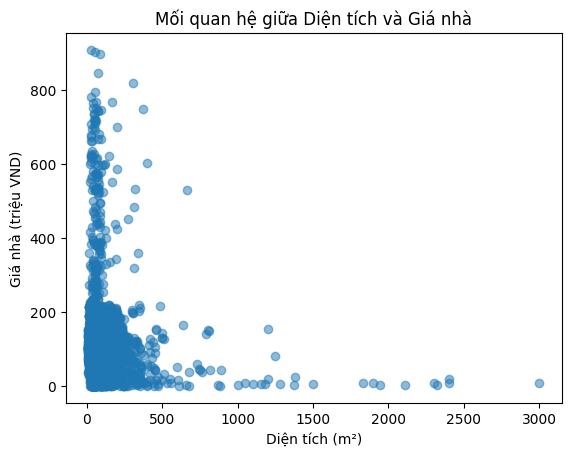

In [71]:
# Xem xét mối quan hệ giữa Diện tích và Giá nhà
plt.scatter(df2['Diện tích'], df2['Giá (triệu đồng/m2)'], alpha=0.5)
plt.title('Mối quan hệ giữa Diện tích và Giá nhà')
plt.xlabel('Diện tích (m²)')
plt.ylabel('Giá nhà (triệu VND)')
plt.show()

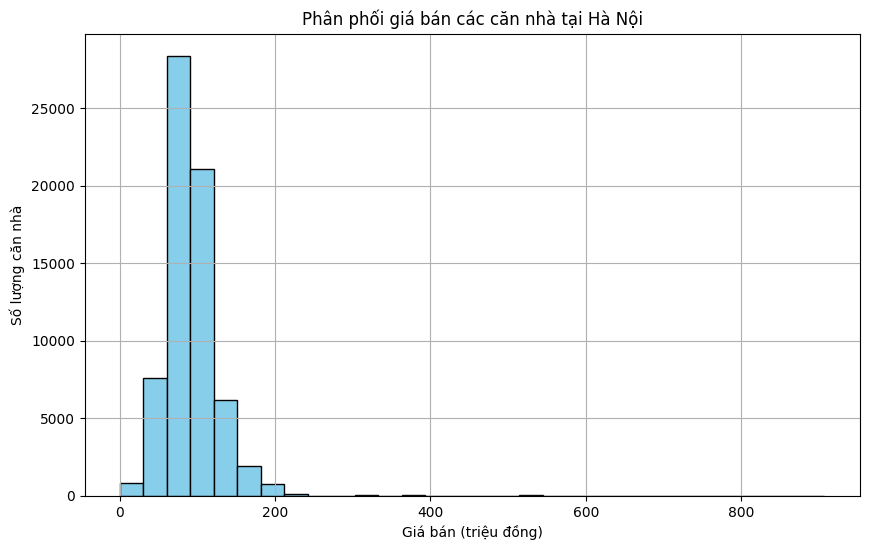

In [72]:
# Vẽ histogram cho giá nhà và diện tích
plt.figure(figsize=(10, 6))
plt.hist(df2['Giá (triệu đồng/m2)'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Giá bán (triệu đồng)')
plt.ylabel('Số lượng căn nhà')
plt.title('Phân phối giá bán các căn nhà tại Hà Nội')
plt.grid(True)
plt.show()

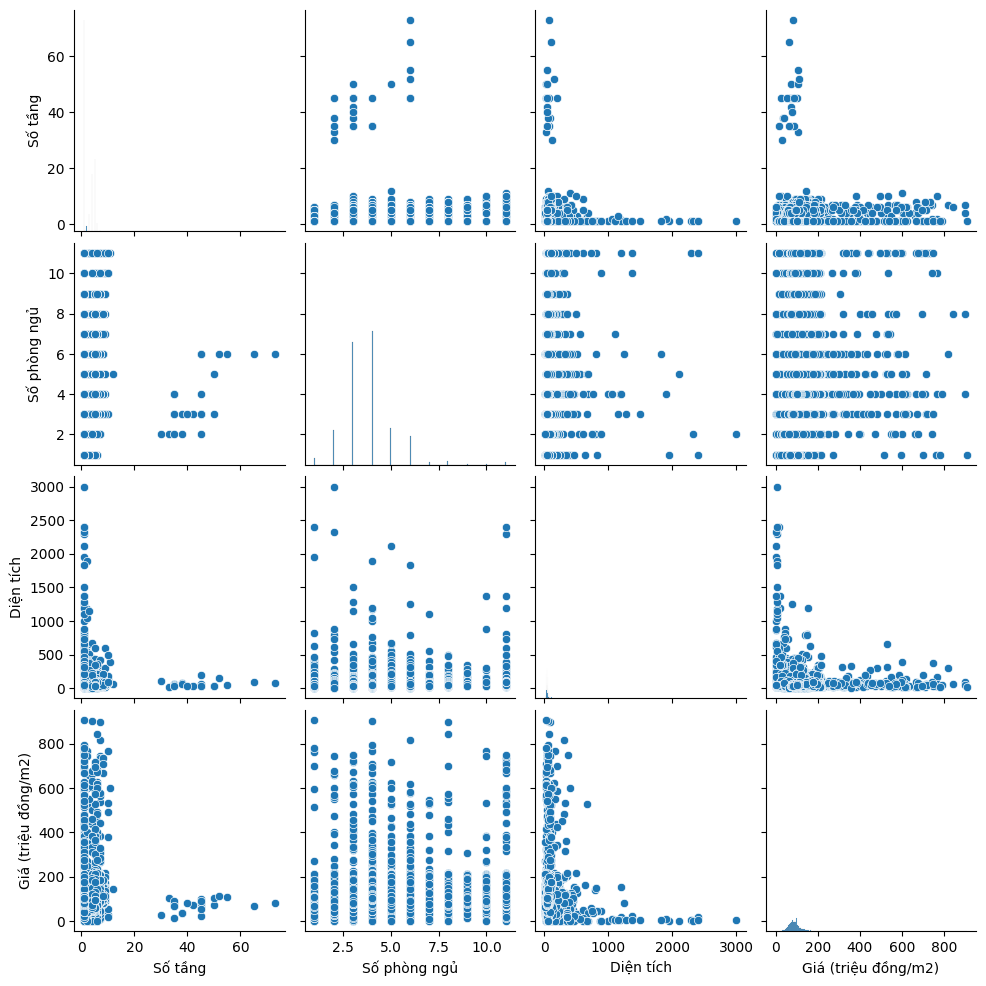

In [73]:
# Sử dụng pairplot để xem mối quan hệ giữa các biến số
numeric_cols = ['Số tầng', 'Số phòng ngủ', 'Diện tích','Giá (triệu đồng/m2)']
sns.pairplot(df2[numeric_cols])
plt.show()

- Xem xét mối tương quan giữa các biến bằng HeatMap

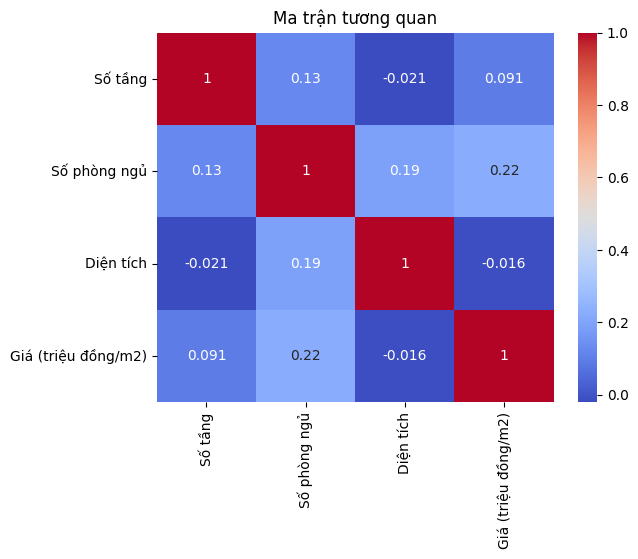

In [74]:
corr_matrix = df2[numeric_cols].corr()

# Vẽ heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

- Dễ dàng nhận thấy mối tương quan giữa các biến là vô cùng yếu và gần như không tác động và ảnh hướng nhiều đến giá bất động sản
* Tổng kết:
* Dễ dàng nhận thấy giá nhà ở Việt Nam phụ thuộc khá nhiều vào vị trí của căn nhà
* Ở những khu vực nội thành giá nhà vô cùng cao dù diện tích nhỏ
* Trái lại ở các khu vực nội thành giá nhà lại rất rẻ do ko có nhu cầu trong kinh doanh hay sinh sống
---
### 4.2. Điều chỉnh tệp dữ liệu đầu vào

In [75]:
import category_encoders as ce # Thư viện hỗ trợ Target Encoding
from sklearn.preprocessing import LabelEncoder # Thư viện hỗ trợ Label Encoding
from sklearn.model_selection import train_test_split # Thư viện hỗ trợ chia dataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Các chỉ số đánh giá

# Linear Regression
from sklearn.linear_model import LinearRegression

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Gradient Bosting
from sklearn.ensemble import GradientBoostingRegressor

In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67026 entries, 0 to 82495
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Địa chỉ              67026 non-null  object 
 1   Quận                 67026 non-null  object 
 2   Huyện                67026 non-null  object 
 3   Loại hình nhà ở      67026 non-null  object 
 4   Giấy tờ pháp lý      67026 non-null  object 
 5   Số tầng              67026 non-null  int64  
 6   Số phòng ngủ         67026 non-null  int64  
 7   Diện tích            67026 non-null  float64
 8   Giá (triệu đồng/m2)  67026 non-null  float64
 9   Tỉnh/Thành phố       67026 non-null  object 
 10  Quận_tableau         67026 non-null  object 
 11  Ngày                 67026 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 6.6+ MB


In [77]:
df2 = df2.drop(columns=['Địa chỉ', 'Quận_tableau', 'Tỉnh/Thành phố'])

In [80]:
# Đánh index cho ngày giúp mô hình hiểu được biến động theo thời gian
df2['Ngày'] = pd.to_datetime(df2['Ngày'])
df2['Ngày_index'] = (df2['Ngày'] - df2['Ngày'].min()).dt.days

In [82]:
df2 = df2.drop(columns=['Ngày'])

In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67026 entries, 0 to 82495
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Quận                 67026 non-null  object 
 1   Huyện                67026 non-null  object 
 2   Loại hình nhà ở      67026 non-null  object 
 3   Giấy tờ pháp lý      67026 non-null  object 
 4   Số tầng              67026 non-null  int64  
 5   Số phòng ngủ         67026 non-null  int64  
 6   Diện tích            67026 non-null  float64
 7   Giá (triệu đồng/m2)  67026 non-null  float64
 8   Ngày_index           67026 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 5.1+ MB


In [84]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm thử (80% huấn luyện, 20% kiểm thử)
df_train, df_test = train_test_split(df2, test_size=0.2, random_state=42)

# Xem số lượng bản ghi của 2 tệp
print("Kích thước tập huấn luyện:", df_train.shape)
print("Kích thước tập kiểm thử:", df_test.shape)

Kích thước tập huấn luyện: (53620, 9)
Kích thước tập kiểm thử: (13406, 9)


- Áp dụng One-hot Endcoding cho 2 cột Loại hình nhà ở và Giấy tờ pháp lý

In [85]:
# Thực hiện One-Hot Encoding cho 2 cột: "Loại hình nhà ở" và "Giấy tờ pháp lý"
df_train = pd.get_dummies(df_train, columns=['Loại hình nhà ở', 'Giấy tờ pháp lý'], drop_first=True)

# Làm với df_test thì tương tự
df_test = pd.get_dummies(df_test, columns=['Loại hình nhà ở', 'Giấy tờ pháp lý'], drop_first=True)

# Kiểm tra kết quả
print(df_train.head())
print(df_test.head())

                    Quận                Huyện  Số tầng  Số phòng ngủ  \
19263       Quận Đống Đa   Phường Láng Thượng        1             3   
66693  Quận Hai Bà Trưng    Phường Thanh Nhàn        4             4   
56855      Huyện Sóc Sơn          Xã Phú Minh        1             4   
48322       Quận Đống Đa  Phường Quốc Tử Giám        1             6   
21890  Quận Hai Bà Trưng     Phường Minh Khai        1             2   

       Diện tích  Giá (triệu đồng/m2)  Ngày_index  \
19263       28.0                62.86         354   
66693       40.0                80.00         318   
56855       50.0                20.00         326   
48322       36.0               122.22         334   
21890       22.0                85.91         353   

       Loại hình nhà ở_Nhà biệt thự  Loại hình nhà ở_Nhà mặt phố, mặt tiền  \
19263                         False                                  False   
66693                         False                                  False   
56855         

- Tiếp tục mã hóa 2 cột Quận và Huyện bằng TargetEncoding

In [86]:
# Khởi tạo Target Encoder
target_encoder = ce.TargetEncoder(cols=['Quận', 'Huyện'])

# Áp dụng Target Encoding trên tập huấn luyện
df_train[['Quận_encoded', 'Huyện_encoded']] = target_encoder.fit_transform(df_train[['Quận', 'Huyện']], df_train['Giá (triệu đồng/m2)'])

# Áp dụng Target Encoding trên tập kiểm thử, nhưng chỉ dùng transform (không fit lại)
df_test[['Quận_encoded', 'Huyện_encoded']] = target_encoder.transform(df_test[['Quận', 'Huyện']])

# Kiểm tra kết quả sau khi mã hóa
print(df_train[['Quận', 'Quận_encoded', 'Huyện', 'Huyện_encoded']].head())
print(df_test[['Quận', 'Quận_encoded', 'Huyện', 'Huyện_encoded']].head())

                    Quận  Quận_encoded                Huyện  Huyện_encoded
19263       Quận Đống Đa    101.860166   Phường Láng Thượng     107.035102
66693  Quận Hai Bà Trưng     88.975304    Phường Thanh Nhàn      89.336189
56855      Huyện Sóc Sơn     42.670197          Xã Phú Minh      82.473688
48322       Quận Đống Đa    101.860166  Phường Quốc Tử Giám      93.320174
21890  Quận Hai Bà Trưng     88.975304     Phường Minh Khai      86.402883
                 Quận  Quận_encoded                 Huyện  Huyện_encoded
16435    Quận Đống Đa    101.860166    Phường Quang Trung      92.954836
35536    Quận Đống Đa    101.860166       Phường Kim Liên      98.375112
69991   Quận Cầu Giấy    111.389119       Phường Quan Hoa     107.981317
57705  Quận Hoàng Mai     79.064960  Phường Hoàng Văn Thụ      83.246117
15582  Quận Long Biên     78.487117       Phường Ngọc Lâm      81.514579


- Lưu trữ cột Quận và Huyện để sử dụng cho kiểm thử mô hình

In [87]:
# Tạo DataFrame cho Quận
df_quan = df_train[['Quận', 'Quận_encoded']].drop_duplicates()
df_quan.to_csv('F:\Data Analyst\Ha Noi Real Estate Visualization\data\Quận.csv', index=False)

# Tạo DataFrame cho Huyện
df_huyen = df_train[['Huyện', 'Huyện_encoded']].drop_duplicates()
df_huyen.to_csv('F:\Data Analyst\Ha Noi Real Estate Visualization\data\Huyện.csv', index=False)

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16984\1338720188.py:3: SyntaxWarning: invalid escape sequence '\D'
  df_quan.to_csv('F:\Data Analyst\Ha Noi Real Estate Visualization\data\Quận.csv', index=False)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16984\1338720188.py:7: SyntaxWarning: invalid escape sequence '\D'
  df_huyen.to_csv('F:\Data Analyst\Ha Noi Real Estate Visualization\data\Huyện.csv', index=False)


- Xem xét lại mối tương quan giữa các biến khi đã mã hóa các cột khác

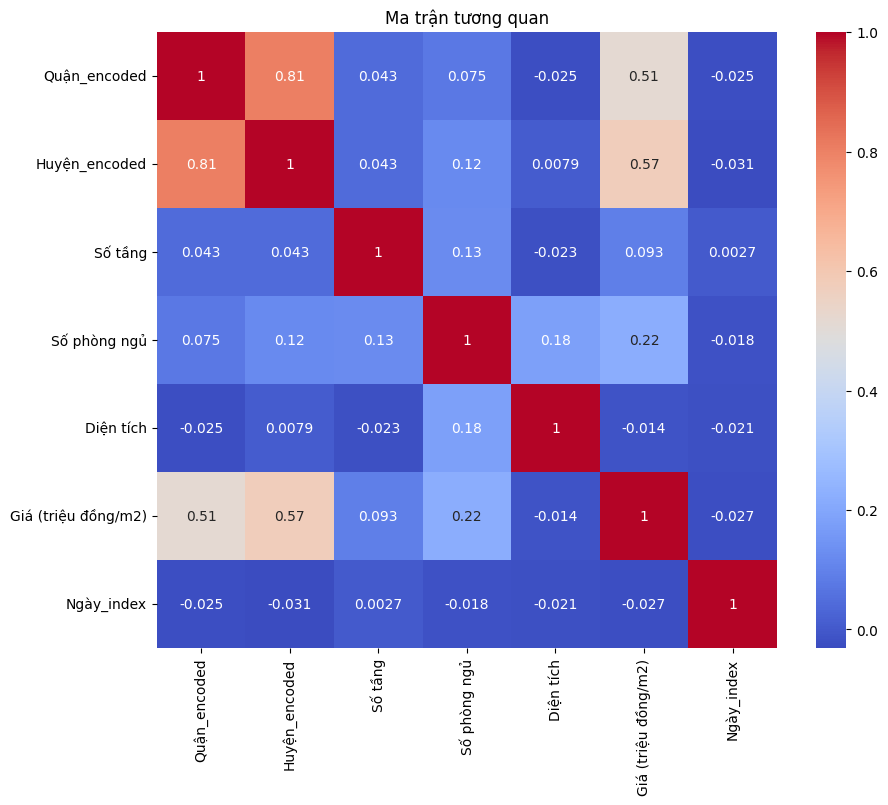

In [88]:
# Vẽ heatmap bằng corr để xem mối tương quan của df_train
numeric_cols2 = ['Quận_encoded','Huyện_encoded','Số tầng', 'Số phòng ngủ', 'Diện tích','Giá (triệu đồng/m2)', 'Ngày_index']
corr_matrix = df_train[numeric_cols2].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

- Bây giờ ta sẽ chia tệp df_train và df_test thành X( chứa các nhãn dùng để dự đoán) và y( chứa biến mục tiêu)

In [89]:
# Chia tập huấn luyện
X_train = df_train.drop('Giá (triệu đồng/m2)', axis=1)  # Các đặc trưng
y_train = df_train['Giá (triệu đồng/m2)']  # Biến mục tiêu

# Chia tập kiểm thử
X_test = df_test.drop('Giá (triệu đồng/m2)', axis=1)  # Các đặc trưng
y_test = df_test['Giá (triệu đồng/m2)'] 

In [90]:
# Loại bỏ cột "Quận" và "Huyện" gốc (chưa mã hóa)
X_train = X_train.drop(columns=['Quận', 'Huyện'])
X_test = X_test.drop(columns=['Quận', 'Huyện'])

# Kiểm tra lại X_train và X_test sau khi đã loại bỏ cột
print(X_train.head())
print(X_test.head())

       Số tầng  Số phòng ngủ  Diện tích  Ngày_index  \
19263        1             3       28.0         354   
66693        4             4       40.0         318   
56855        1             4       50.0         326   
48322        1             6       36.0         334   
21890        1             2       22.0         353   

       Loại hình nhà ở_Nhà biệt thự  Loại hình nhà ở_Nhà mặt phố, mặt tiền  \
19263                         False                                  False   
66693                         False                                  False   
56855                         False                                  False   
48322                         False                                  False   
21890                         False                                  False   

       Loại hình nhà ở_Nhà ngõ, hẻm  Loại hình nhà ở_Nhà phố liền kề  \
19263                          True                            False   
66693                          True                     

In [91]:
# Xem các cột của X_train
print(X_train.columns)

Index(['Số tầng', 'Số phòng ngủ', 'Diện tích', 'Ngày_index',
       'Loại hình nhà ở_Nhà biệt thự', 'Loại hình nhà ở_Nhà mặt phố, mặt tiền',
       'Loại hình nhà ở_Nhà ngõ, hẻm', 'Loại hình nhà ở_Nhà phố liền kề',
       'Giấy tờ pháp lý_Không rõ', 'Giấy tờ pháp lý_Đang chờ sổ',
       'Giấy tờ pháp lý_Đã có sổ', 'Quận_encoded', 'Huyện_encoded'],
      dtype='object')


### 4.3. Thử nghiệm với Linear Regression và Random Forest
- Bắt đầu với Linear Regression

In [92]:
# Khởi tạo mô hình Linear Regression
model = LinearRegression()

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

LinearRegression()

In [93]:
# Dự đoán trên tập kiểm thử
y_pred = model.predict(X_test)

In [94]:
# Đánh giá mô hình bằng cách in ra các chỉ số
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 19.449517564789186
Mean Squared Error (MSE): 813.602964560903
Root Mean Squared Error (RMSE): 28.523726344236707
R-squared (R2): 0.3624496008238288


- Có vẻ Linear Regression đang không hoạt động quá tốt với tệp dữ liệu
- Chỉ số R2 rất thấp đồng nghĩa với việc mô hình không hoạt động tốt và có khả năng đã bị underfitting
---
- Chuyển qua mô hình Random Forest

In [95]:
# Khởi tạo mô hình RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=200,max_depth=10, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [96]:
# Dự đoán trên tập kiểm thử
y_pred_rf = rf_model.predict(X_test)

In [97]:
# Tính các chỉ số đánh giá
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# In kết quả
print(f"Random Forest Regression - Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest Regression - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest Regression - Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Random Forest Regression - R-squared (R²): {r2_rf}")

Random Forest Regression - Mean Absolute Error (MAE): 18.02604201929966
Random Forest Regression - Mean Squared Error (MSE): 693.8174593658835
Random Forest Regression - Root Mean Squared Error (RMSE): 26.340414942932913
Random Forest Regression - R-squared (R²): 0.4563151593076529


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 5. Tổng kết
- Qua quá trình EDA và thử nghiệm nhanh với hai mô hình ta dễ dàng nhận thấy dữ liệu vô cùng hỗn loạn khiến mô hình khó khăn trong việc dự đoán. Giá bất động sản gần như chỉ phụ thuộc vào Quận và Huyện, các yếu tố khác gần như không tác động nhiều đến giá bất động sản
- Mô hình có các chỉ số rất thấp cho thấy rằng không thể dự đoán được xu hướng giá
- Cần điều chỉnh lại tệp dữ liệu đầu vào để mô hình có hiệu suất tốt hơn
- Thực hiện các kỹ thuật tìm kiếm tham số tốt nhất cho mô hình như RandomSearch và GridSearch